### Import Modules

In [147]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns




from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [148]:
df=pd.read_csv('../data/processed/unique.csv')

In [149]:
df.head()

,Brand,Mobile Name,Front Camera (in MP),Primary Camera (in MP),Memory,RAM,Processor Performance,Battery Power(in mAh),Screen Height,Screen Width,Ratings,Price,Mobile Category,Price Range
0,Apple,iPhone 14 Pro Max,32,200,1024,24,5.0,1074.0,2520,1080,4.0,119405.30,Flagship,130000-140000
1,Apple,iPhone 14 Pro Max,32,200,512,24,5.0,1074.0,2520,1080,4.9,113962.24,Flagship,110000-120000
2,Apple,iPhone 14 Pro,32,200,512,24,5.0,1086.0,2460,1080,3.4,222232.56,Flagship,220000-230000
3,Apple,iPhone 14 Pro Max,32,200,1024,16,5.0,1074.0,2520,1080,4.2,219022.20,Flagship,210000-220000
4,Apple,iPhone 12 Pro,32,108,1024,16,5.0,1788.5,2660,1170,4.4,216084.16,Flagship,210000-220000


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   1316 non-null   object 
 1   Mobile Name             1316 non-null   object 
 2   Front Camera (in MP)    1316 non-null   int64  
 3   Primary Camera (in MP)  1316 non-null   int64  
 4   Memory                  1316 non-null   int64  
 5   RAM                     1316 non-null   int64  
 6   Processor Performance   1316 non-null   float64
 7   Battery Power(in mAh)   1316 non-null   float64
 8   Screen Height           1316 non-null   int64  
 9   Screen Width            1316 non-null   int64  
 10  Ratings                 1316 non-null   float64
 11  Price                   1316 non-null   float64
 12  Mobile Category         1316 non-null   object 
 13  Price Range             1316 non-null   object 
dtypes: float64(4), int64(6), object(4)
memor

### Regression 

In [151]:



# Define the features and target variable
features = ['Battery Power(in mAh)', 'RAM', 'Memory', 'Processor Performance', 'Primary Camera (in MP)','Front Camera (in MP)']
target = 'Price'

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()   

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


# Save the scaler
joblib.dump(scaler, '../models/mainscaler.joblib')

['../models/mainscaler.joblib']

In [152]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

model =GradientBoostingRegressor()
model.fit(X_train_normalized, y_train)



GradientBoostingRegressor()

In [153]:


print("Train Metrics")

y_pred = model.predict(X_train_normalized)

mae = mean_absolute_error(y_train, y_pred)
print(f'Mean Absolute Error: {mae}')

mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

rmse=root_mean_squared_error(y_train, y_pred)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_train, y_pred)
print(f'R2 Score: {r2}')


Train Metrics
Mean Absolute Error: 8482.073013695064
Mean Squared Error: 157457091.67750084
Root Mean Squared Error: 12548.190773075648
R2 Score: 0.9140165782742022


In [154]:

print("Test Metrics")

y_pred = model.predict(X_test_normalized)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse=root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')


Test Metrics
Mean Absolute Error: 11205.594512370804
Mean Squared Error: 276247579.80170923
Root Mean Squared Error: 16620.6973319927
R2 Score: 0.8288738197471663


In [155]:
print(np.mean(y_test),np.mean(model.predict(X_test_normalized)))

49606.58496212121 50032.480826985906


In [156]:

# Save the model using joblib
joblib_filename = '../models/myreg.joblib'
joblib.dump(model, joblib_filename)


['../models/myreg.joblib']

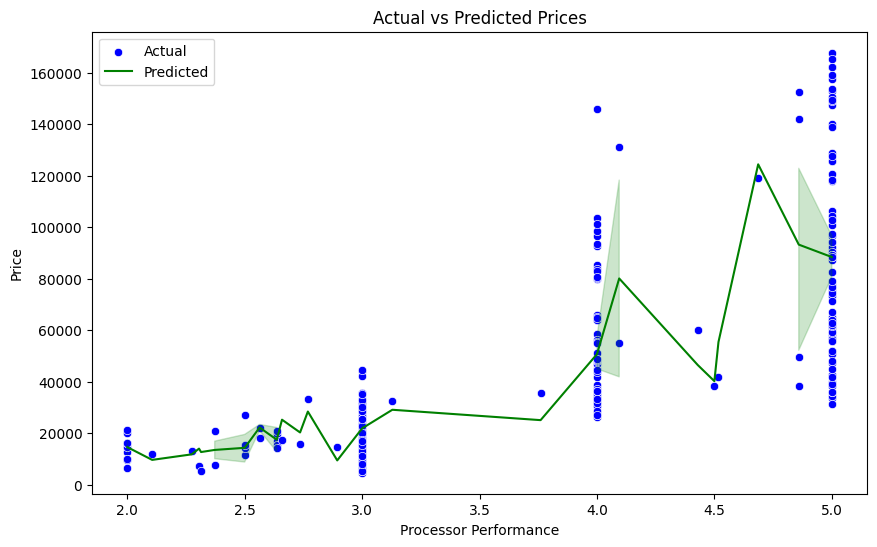

In [157]:


# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Processor Performance': X_test['Processor Performance'],
    'RAM': X_test['RAM'],
    'Memory': X_test['Memory'],
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

# Plot the actual data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Processor Performance', y='Actual Price', data=plot_data, label='Actual', color='blue')

# # Plot the prediction line
sns.lineplot(x='Processor Performance', y='Predicted Price', data=plot_data, label='Predicted', color='green')

# Add titles and labels
plt.title('Actual vs Predicted Prices')
plt.xlabel('Processor Performance')
plt.ylabel('Price')
plt.legend()
plt.show()


### Classification

In [158]:

# Define the features and target variable
features = ['Battery Power(in mAh)', 'RAM', 'Memory', 'Processor Performance', 'Primary Camera (in MP)','Front Camera (in MP)']
target = 'Mobile Category'

# Split the data into training and testing sets
X = df[features]
# y = df[target]
y = pd.factorize(df[target])[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()   

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save the scaler
joblib.dump(scaler, '../models/classifyscaler.joblib')

['../models/classifyscaler.joblib']

In [159]:
df[target].value_counts()

Mobile Category
Budget      733
Midrange    375
Flagship    208
Name: count, dtype: int64

In [160]:
from collections import Counter
class_counts = Counter(y)

class_counts

Counter({np.int64(2): 733, np.int64(1): 375, np.int64(0): 208})

In [161]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

model=SVC()

model.fit(X_train_normalized, y_train)


SVC()

Accuracy: 0.9096958174904943
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       172
           1       0.83      0.86      0.84       293
           2       0.95      0.96      0.96       587

    accuracy                           0.91      1052
   macro avg       0.90      0.88      0.89      1052
weighted avg       0.91      0.91      0.91      1052



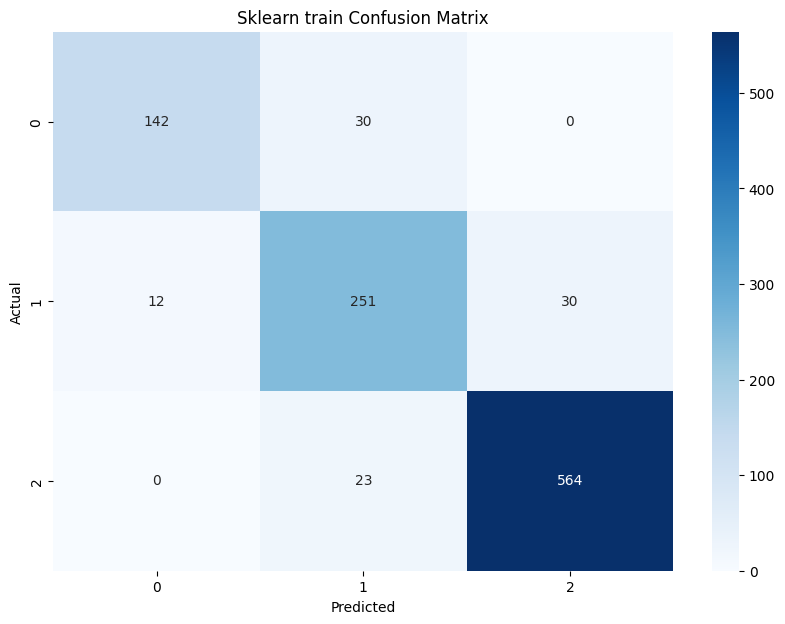

In [162]:
y_pred = model.predict(X_train_normalized)

accuracy = accuracy_score(y_train, y_pred)
cr=classification_report(y_train, y_pred)
cm=confusion_matrix(y_train, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report: \n{cr}')

cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Sklearn train Confusion Matrix')
plt.show()


Accuracy: 0.8901515151515151
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.81      0.85        36
           1       0.84      0.79      0.82        82
           2       0.91      0.97      0.94       146

    accuracy                           0.89       264
   macro avg       0.89      0.85      0.87       264
weighted avg       0.89      0.89      0.89       264



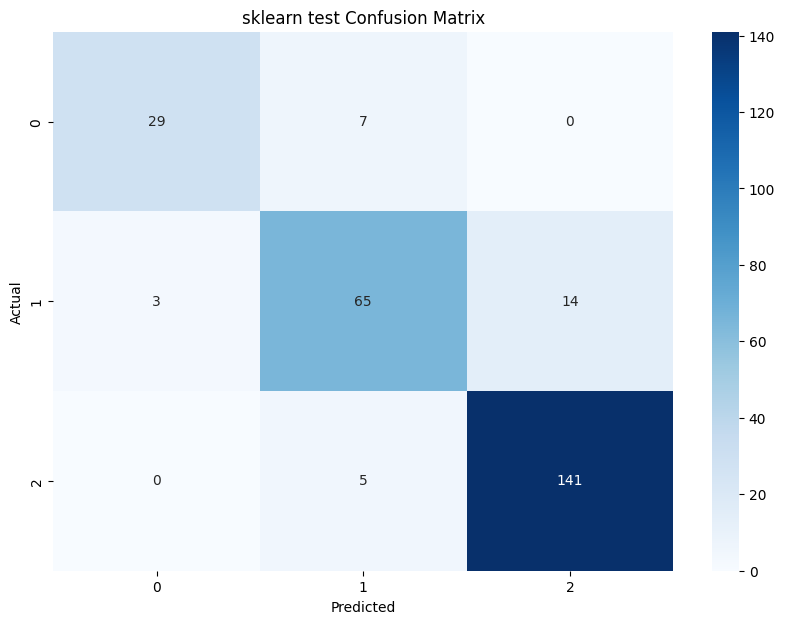

In [163]:
y_pred = model.predict(X_test_normalized)

accuracy = accuracy_score(y_test, y_pred)
cr=classification_report(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report: \n{cr}')

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('sklearn test Confusion Matrix')
plt.show()


In [164]:

# Save the model using joblib
joblib_filename = '../models/myclassify.joblib'
joblib.dump(model, joblib_filename)


['../models/myclassify.joblib']

In [165]:
X_test.iloc[0]

Battery Power(in mAh)     1348.0
RAM                         16.0
Memory                     256.0
Processor Performance        4.0
Primary Camera (in MP)     200.0
Front Camera (in MP)        32.0
Name: 198, dtype: float64

In [166]:
model.predict(X_test_normalized)[0]

np.int64(1)

### Own Models

In [167]:
import shasha
from shasha import My_DecisionTree,My_Random_Forest

In [168]:

model=My_Random_Forest(n_trees=10,max_depth=100,min_samples_split=3)
model.fit(X_train_normalized,y_train)



100%|██████████| 10/10 [00:01<00:00,  5.04it/s]


Accuracy: 0.9800380228136882
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       172
           1       0.96      0.97      0.96       293
           2       0.99      0.99      0.99       587

    accuracy                           0.98      1052
   macro avg       0.98      0.98      0.98      1052
weighted avg       0.98      0.98      0.98      1052



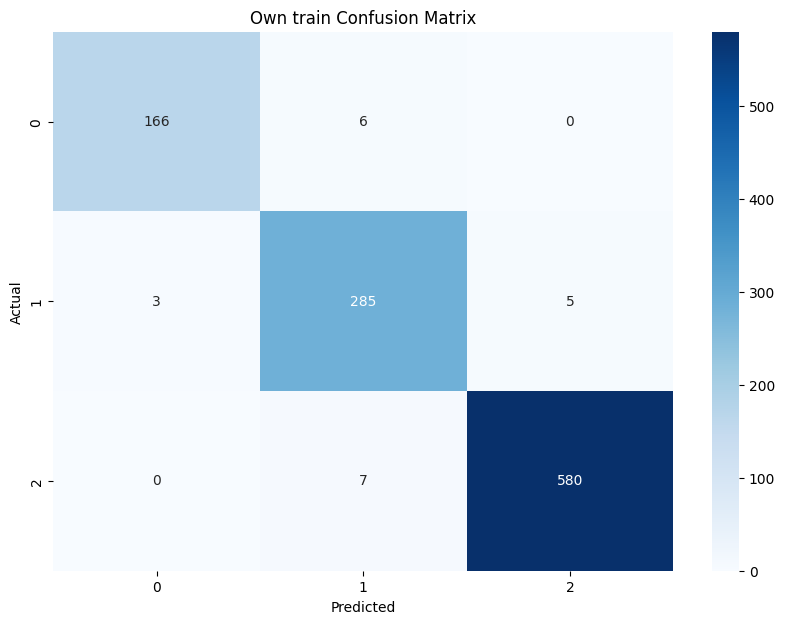

In [169]:


y_pred = model.predict(X_train_normalized)

accuracy = accuracy_score(y_train, y_pred)
cr=classification_report(y_train, y_pred)
cm=confusion_matrix(y_train, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report: \n{cr}')

cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Own train Confusion Matrix')
plt.show()


Accuracy: 0.8560606060606061
Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        36
           1       0.81      0.71      0.75        82
           2       0.90      0.95      0.93       146

    accuracy                           0.86       264
   macro avg       0.82      0.82      0.82       264
weighted avg       0.85      0.86      0.85       264



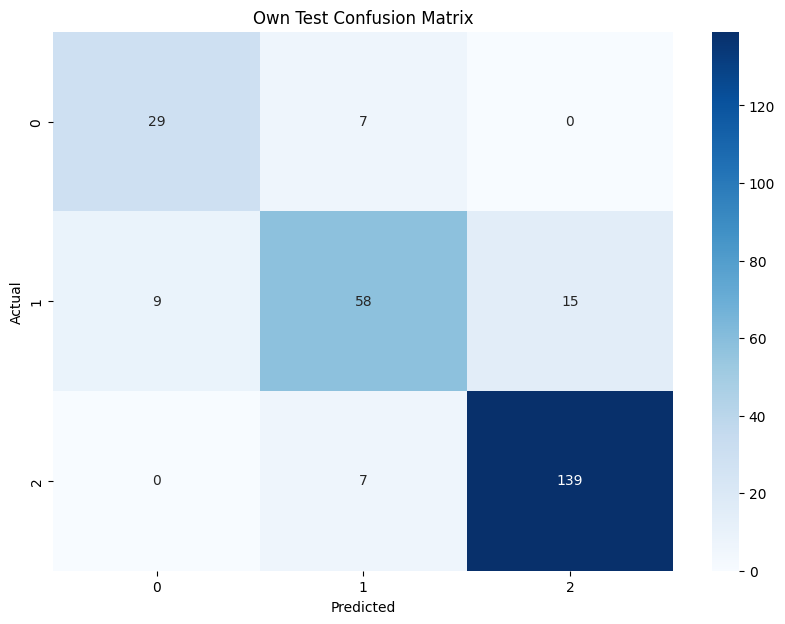

In [170]:

y_pred = model.predict(X_test_normalized)

accuracy = accuracy_score(y_test, y_pred)
cr=classification_report(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report: \n{cr}')

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Own Test Confusion Matrix')
plt.show()


In [171]:
# Save the model using joblib
joblib_filename = '../models/shashaclassify.joblib'
joblib.dump(model, joblib_filename)

['../models/shashaclassify.joblib']

### Clustering

In [172]:


# Define the features and target variable
features = ['Battery Power(in mAh)', 'RAM', 'Memory', 'Processor Performance', 'Primary Camera (in MP)','Front Camera (in MP)',"Price"]
target = 'Mobile Category'

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()   

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


# Save the scaler
joblib.dump(scaler, '../models/kmeanscaler.joblib')

['../models/kmeanscaler.joblib']

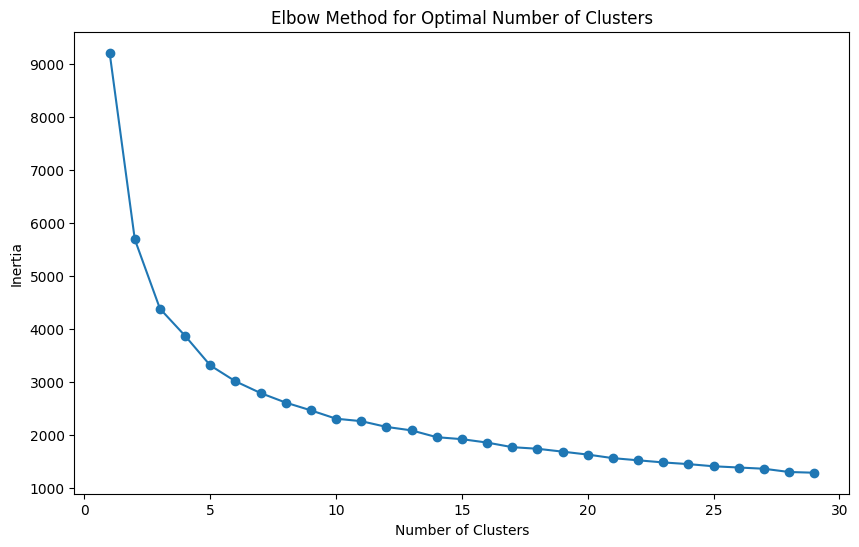

In [173]:
from sklearn.cluster import KMeans

data = pd.read_csv("../data/processed/unique.csv")

features = data[["Battery Power(in mAh)", "RAM", "Memory", "Processor Performance", "Primary Camera (in MP)", "Front Camera (in MP)", "Price"]]


features_scaled = scaler.fit_transform(features)


inertia = []
n_clusters_range = range(1, 30)  

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


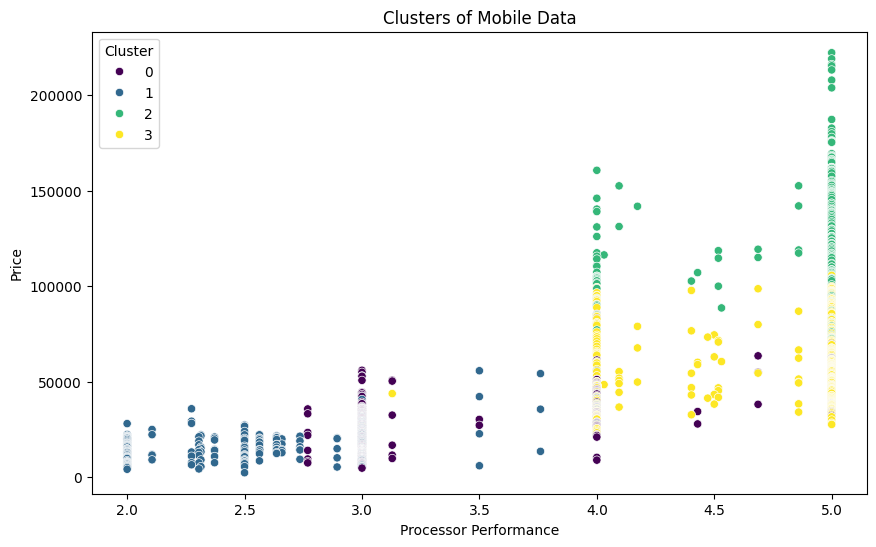

In [174]:
# Cluster the data into 3 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Processor Performance', y='Price', hue='Cluster', palette='viridis', data=data)
plt.title('Clusters of Mobile Data')
plt.xlabel('Processor Performance')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()